# Exploring bank stock data

This notebook will explore and visualize stock data for different banks from Jan 2006 to Jan 2016 (exclusive). I'm really just trying stuff out based on Jose Portilla's Udemy course for data science, machine learning, and visualization.

In [1]:
import pandas_datareader as pdr
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

I will pull data from the following banks:

* Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

I'll use the pandas-datareader library to pull stock data from Yahoo Finance. Documentation for this great library at https://pandas-datareader.readthedocs.io/en/latest/

In [2]:
# set time horizons
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

# pull yahoo finance data into separate dataframes
bank = pd.DataFrame(data.DataReader('BAC','yahoo',start,end))
citi = pd.DataFrame(data.DataReader('C','yahoo',start,end))
goldman = pd.DataFrame(data.DataReader('GS','yahoo',start,end))
jp = pd.DataFrame(data.DataReader('JPM','yahoo',start,end))
morgan = pd.DataFrame(data.DataReader('MS','yahoo',start,end))
wells = pd.DataFrame(data.DataReader('WFC','yahoo',start,end))

In [3]:
# create multilevel dataframe
tickers=['BAC','C','GS','JPM','MS','WFC']
bank_stocks = pd.concat([bank,citi,goldman,jp,morgan,wells],axis=1,keys=tickers)

In [4]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [5]:
# check out this finished product
bank_stocks.head()

Bank Ticker        BAC                                                        \
Stock Info        Open       High        Low      Close  Adj Close    Volume   
Date                                                                           
2006-01-03   46.919998  47.180000  46.150002  47.080002  37.000080  16296700   
2006-01-04   47.000000  47.240002  46.450001  46.580002  36.607124  17757900   
2006-01-05   46.580002  46.830002  46.320000  46.639999  36.654278  14970700   
2006-01-06   46.799999  46.910000  46.349998  46.570000  36.599277  12599800   
2006-01-09   46.720001  46.970001  46.360001  46.599998  36.622845  15619400   

Bank Ticker           C                                        ...     \
Stock Info         Open        High         Low       Close    ...      
Date                                                           ...      
2006-01-03   490.000000  493.799988  481.100006  492.899994    ...      
2006-01-04   488.600006  491.000000  483.500000  483.799988    ...      
2006-01-05   484.399994  487.799988  484.000000  486.200012    ...      
2006-01-06   488.799988  489.000000  482.000000  486.200012    ...      
2006-01-09   486.000000  487.399994  483.000000  483.899994    ...      

Bank Ticker         MS                                       WFC             \
Stock Info         Low      Close  Adj Close   Volume       Open       High   
Date                                                                          
2006-01-03   56.740002  58.310001  40.062382  5377000  31.600000  31.975000   
2006-01-04   58.349998  58.349998  40.089870  7977800  31.799999  31.820000   
2006-01-05   58.020000  58.509998  40.199799  5778000  31.500000  31.555000   
2006-01-06   58.049999  58.570000  40.241035  6889800  31.580000  31.775000   
2006-01-09   58.619999  59.189999  40.666996  4144500  31.674999  31.825001   

Bank Ticker                                             
Stock Info         Low      Close  Adj Close    Volume  
Date                                                    
2006-01-03   31.195000  31.900000  23.077190  11016400  
2006-01-04   31.365000  31.530001  22.809519  10870000  
2006-01-05   31.309999  31.495001  22.784204  10158000  
2006-01-06   31.385000  31.680000  22.918036   8403800  
2006-01-09   31.555000  31.674999  22.914423   5619600  

[5 rows x 36 columns]

### Max close value

In [6]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

### Day-to day returns 

I'll use pandas' pct_change() DataFrame method to get day-to-day returns for each stock.

In [7]:
returns = pd.DataFrame()

In [8]:
for ticker in tickers:
    returns[ticker] = bank_stocks.xs(key='Close',axis=1,level='Stock Info')[ticker].pct_change()

In [9]:
returns.head()

,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


### Pairwise returns

The bank stocks should largely move together

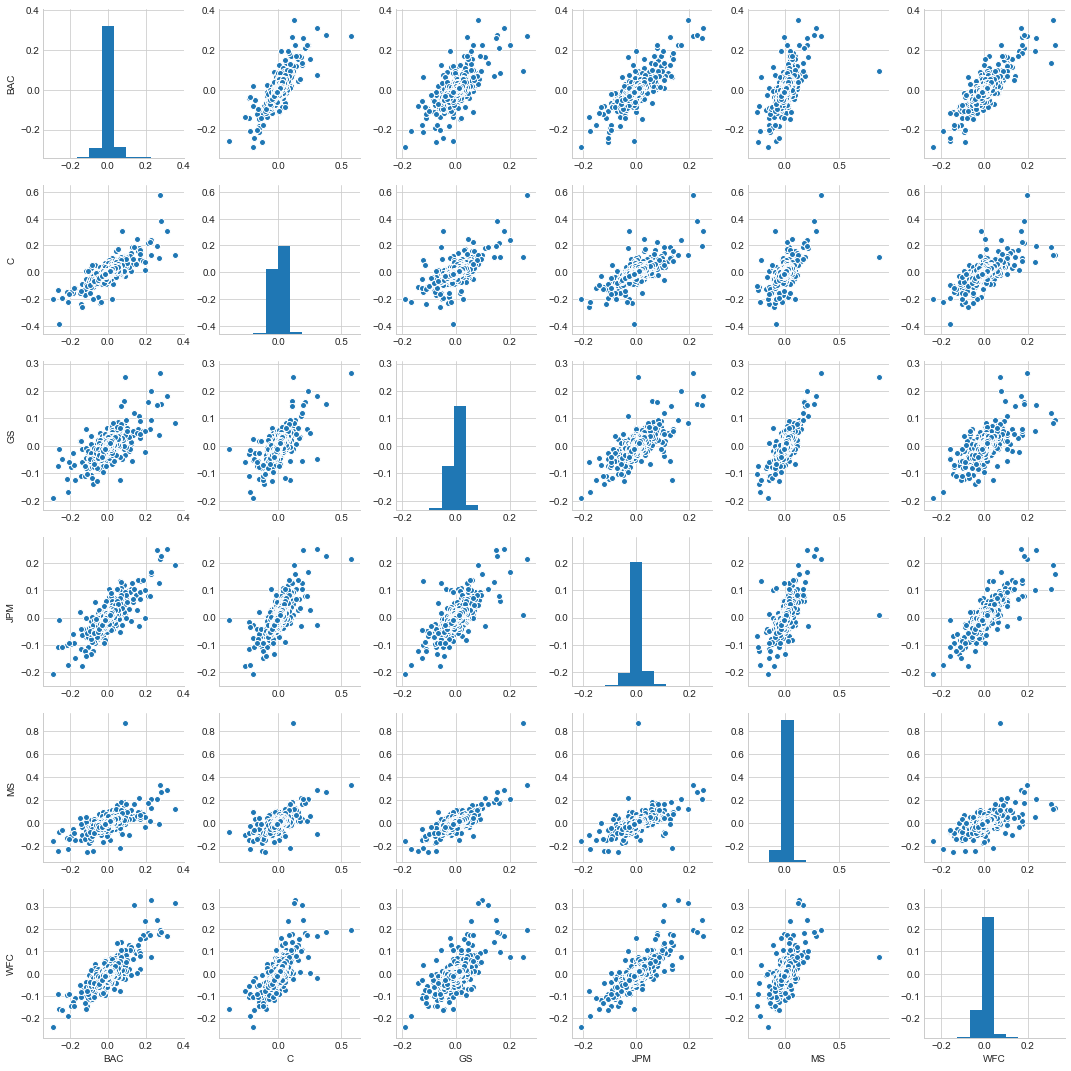

In [10]:
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline
sns.pairplot(returns[1:])

### Worst day for the stocks

In [11]:
returns.idxmin()

BAC   2009-01-20
C     2009-02-27
GS    2009-01-20
JPM   2009-01-20
MS    2008-10-09
WFC   2009-01-20
dtype: datetime64[ns]

Four of the banks share a worst day; all of them occured in the same four-month span.

### Best day for the stocks

In [12]:
returns.idxmax()

BAC   2009-04-09
C     2008-11-24
GS    2008-11-24
JPM   2009-01-21
MS    2008-10-13
WFC   2008-07-16
dtype: datetime64[ns]

Three are clustered around Oct/Nov 2008. The others are pretty close as well. Volatile days.

In [13]:
returns.std()

BAC    0.036647
C      0.038672
GS     0.025390
JPM    0.027667
MS     0.037819
WFC    0.030238
dtype: float64

In [14]:
returns.ix['2015-01-01':'2015-12-31'].std()

/Users/russell/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


BAC    0.016163
C      0.015289
GS     0.014046
JPM    0.014017
MS     0.016249
WFC    0.012591
dtype: float64

### Distribution of Morgan Stanley day-to-day returns in 2015

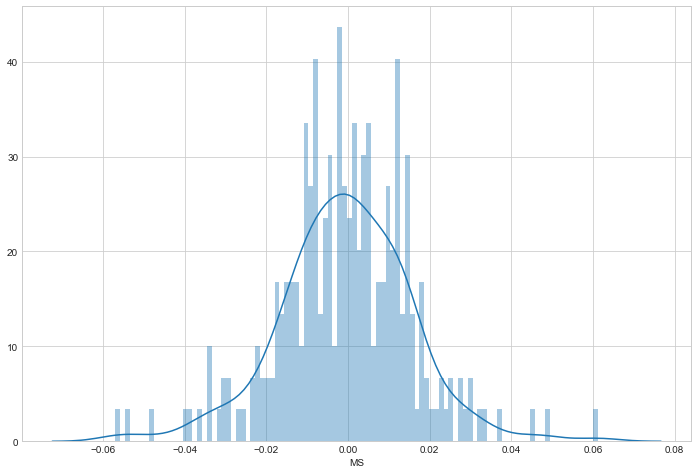

In [15]:
plt.figure(figsize=(12,8))
sns.distplot(returns['MS']\
             .dropna()\
             .loc['2015-01-01':'2015-12-31'],bins=100)

### Distribution of Citibank's day-to-day returns in 2008

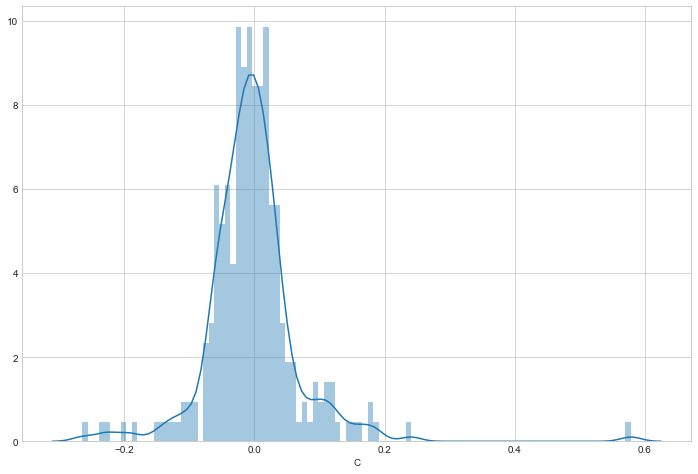

In [16]:
sns.set_style('whitegrid')

plt.figure(figsize=(12,8))
sns.distplot(returns['C']\
             .dropna()\
             .loc['2008-01-01':'2008-12-31'],bins=100
            )

In [17]:
import plotly

## Stock price over time (scaled)

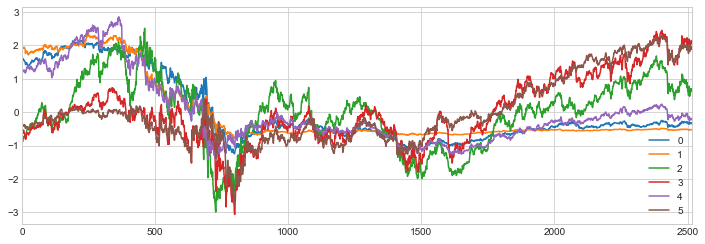

In [18]:
# plot scaled close price for each stock over time
from sklearn.preprocessing import scale
pd.DataFrame(
    scale(
        bank_stocks\
        .xs(key='Close',axis=1,level='Stock Info')))\
.plot(figsize=(12,4),label=tickers)

plt.legend()

Didn't work too well because the legend would't work

## Stock prices over time (raw)

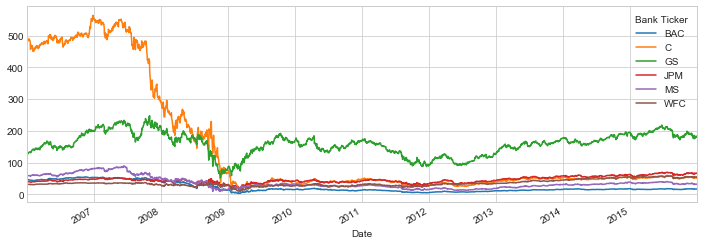

In [19]:
# plot raw closing price over time
bank_stocks\
.xs(key='Close',axis=1,level='Stock Info')\
.plot(figsize=(12,4))

## Bank of America's 30-day moving average in 2008

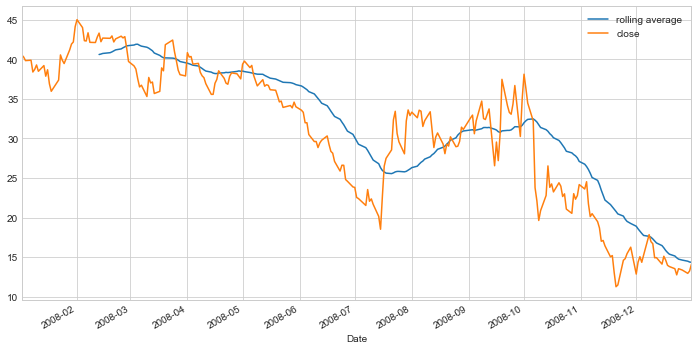

In [20]:
# plot moving average of Bank of America in 2008
plt.figure(figsize=(12,6))

bank['Close']\
.loc['2008-01-01':'2009-01-01']\
.rolling(window=30).mean().plot(label='rolling average')

bank['Close']\
.loc['2008-01-01':'2009-01-01']\
.plot(label='close')

plt.legend()

## Correlation of banks' closing prices

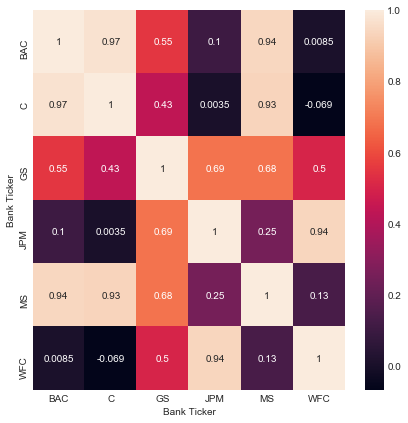

In [21]:
plt.figure(figsize=(7,7))
sns.heatmap(
    bank_stocks\
    .xs(key='Close',axis=1,level='Stock Info')\
    .corr(),
    annot=True
)

## Clusters of correlation of banks' closing prices 

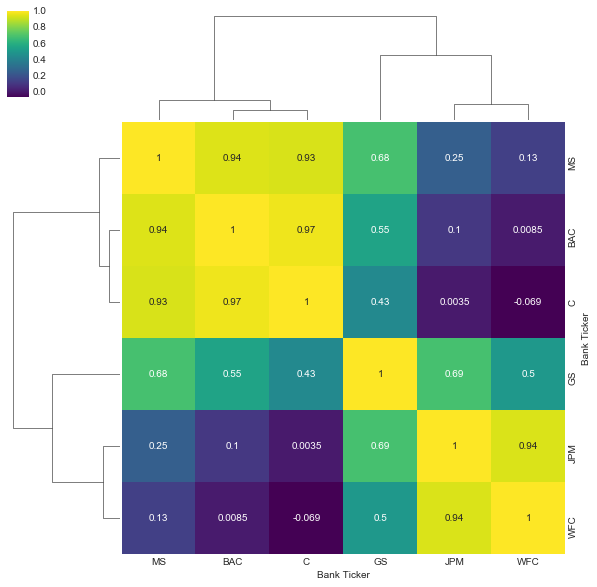

In [22]:
plt.figure(figsize=(7,7))
sns.clustermap(
    bank_stocks\
    .xs(key='Close',axis=1,level='Stock Info')\
    .corr(),
    annot=True,
    cmap='viridis'
)